# Notebook #3: Seaborn Deep Dive

## Table of Contents:
###  1) What is Seaborn?
###  2) Basics and Paradigms
###  3) Working with a Dataset

### 1) What is Seaborn?

#### Seaborn is a data visualization library in python that is built upon the previously mentioned MatPlotLib. 

### 2) Basics and Paradigms

In [1]:
## For seaborn, the most common partner library we'll be using is pandas due to the ease that dataframes create in seaborn
import pandas as pd
## Next, lets import matplotlib just in case we want to do any finetuning to our seaborn plots. Seaborn is not a replacement
## for matplotlib, but rather a complement.
from matplotlib import pyplot as plt
## Finally, let's import seaborn
import seaborn as sns

In [2]:
## Let's bring in our dataset
df = pd.read_csv('Aleutians.csv', index_col=0)
df.head()

,SAMPLE_NAME,IGSN,SAMPLE_TYPE,LATITUDE,LONGITUDE,ELEVATION_MIN,ELEVATION_MAX,TECTONIC_SETTING,ROCK NAME,REFERENCE,...,MT[MODE],GM[MODE],VES[MODE],AMPH[MODE],FETI-OX[MODE],HORN[MODE],OX[MODE],PYR,SP[MODE],TI-MT[MODE]
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
70B-029,70B-29,NaN,Whole Rock,52.6342,174.8567,-730.0,-730.0,VOLCANIC_ARC,DACITE,"YOGODZINSKI, 2015[2792]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CON0010-199,RC10-199,NaN,Whole Rock,51.3169,-174.0167,NaN,NaN,VOLCANIC_ARC,SEDIMENTARY,"KAY, 1978[2568]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CON0010-208,RC10-208,NaN,Whole Rock,51.6461,-171.7667,NaN,NaN,VOLCANIC_ARC,SEDIMENTARY,"KAY, 1978[2568]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DSDP018-0178,DSDP-178,NaN,Whole Rock,56.9585,-147.1310,-4218.0,-4218.0,VOLCANIC_ARC,THOLEIITE,"VON DRACH, 1986[2565]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DSDP018-0178-001R-001/088-094,178 1 1 88–94,NaN,Whole Rock,56.9585,-147.1310,-4218.0,-4218.0,VOLCANIC_ARC,SEDIMENTARY,"NIELSEN, 2016[3143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Seaborn has a lot of plots that we can access with 1 simple function call that we can tweak with matplotlib after the fact. Let's look at an example of this and then look at all the other possible plots.


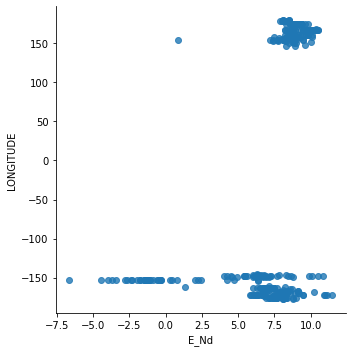

In [3]:
## First, lets look at a scatter plot
sns.lmplot(x="E_Nd",y="LONGITUDE", data=df, fit_reg=False)
## X will pull the wanted x values from the dataframe we pass in, Y will pull the wanted y values from the dataframe we pass
## in, data will take our dataframe, fit_reg will control whether or not the regression line will be fit in the plot/

(130.0, 200.0)

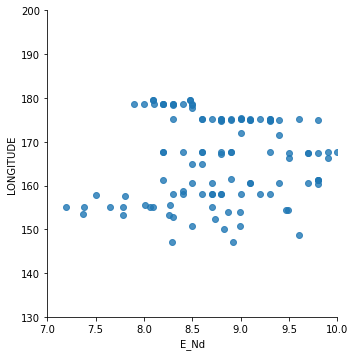

In [4]:
## Now lets do a little tweaking with matplotlib to get a more interesting plot
sns.lmplot(x="E_Nd",y="LONGITUDE", data=df, fit_reg=False)

plt.xlim(7.0, 10)
plt.ylim(130, 200)

<AxesSubplot:>

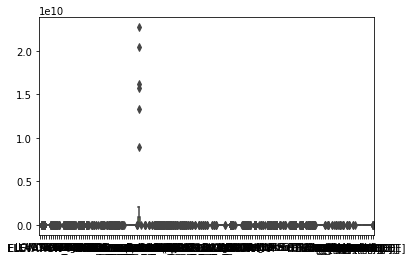

In [5]:
## Now, let's make a box plot
sns.boxplot(data=df)

In [6]:
## This is a really ugly plot because of the large collection of data, lets preprocess our data to get a cleaner plot
df1 = df["LATITUDE"]
df2 = df["LONGITUDE"]
df3 = df["ELEVATION_MIN"]
df4 = df["ELEVATION_MAX"]
new_df = pd.concat([df1, df2,df3,df4], axis = 1)

## This code allows us to carefully handpick keys from the dataframe
new_df.head()

,LATITUDE,LONGITUDE,ELEVATION_MIN,ELEVATION_MAX
SAMPLE_ID,,,,
70B-029,52.6342,174.8567,-730.0,-730.0
CON0010-199,51.3169,-174.0167,NaN,NaN
CON0010-208,51.6461,-171.7667,NaN,NaN
DSDP018-0178,56.9585,-147.1310,-4218.0,-4218.0
DSDP018-0178-001R-001/088-094,56.9585,-147.1310,-4218.0,-4218.0


<AxesSubplot:>

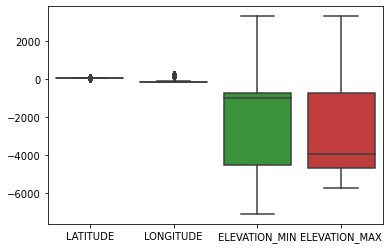

In [7]:
## Now, let's make a box plot
sns.boxplot(data=new_df)

<AxesSubplot:>

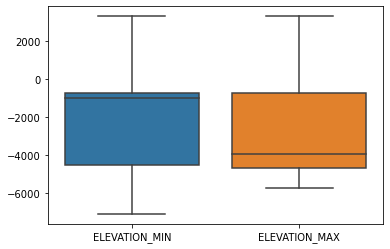

In [8]:
## But now our latitude and longutude boxes are squished because of the scale of the elevation, so lets drop them
new_df_minus_2 = new_df.drop(["LATITUDE", "LONGITUDE"], axis=1)
sns.boxplot(data=new_df_minus_2)

(34.0, 50.0)

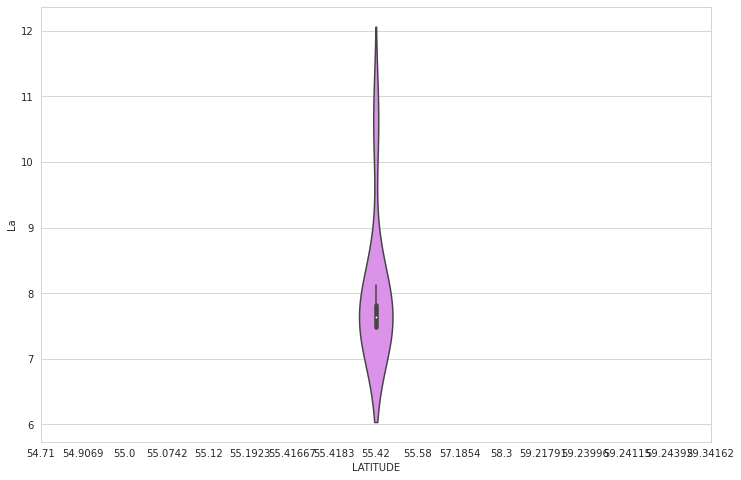

In [47]:
## Let's now touch on one of the reasons that Seaborn is so widely used and accepted: the inbuilt themes. These themes are 
## already very presentable and professional, so you don't have to waste a lot of time to do all this styling work yourself.

## Let's also learn about another plot: violin plots.


sns.set_style('whitegrid') # Change the theme
 
plt.figure(figsize=(12,8)) # Use matplot lib to set plot dimensions
sns.violinplot(x="LATITUDE",y="La", data=df[150:300])

plt.xlim(34, 50)

(34.0, 50.0)

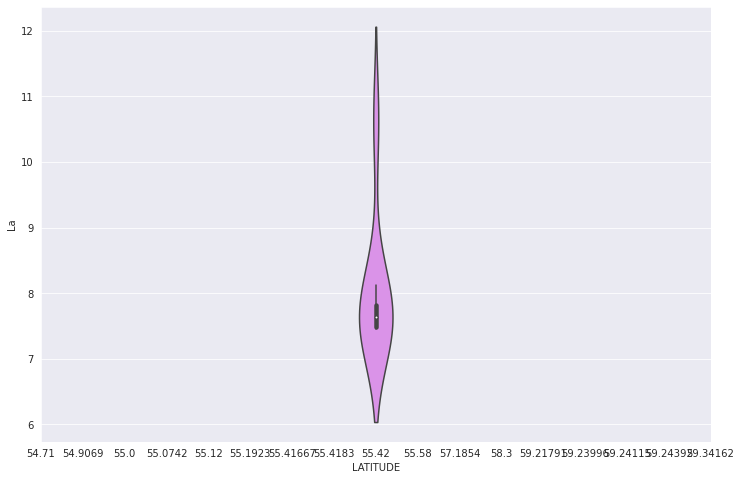

In [48]:
## Let's try another theme
sns.set_style('darkgrid') # Change the theme
 
plt.figure(figsize=(12,8)) # Use matplot lib to set plot dimensions
sns.violinplot(x="LATITUDE",y="La", data=df[150:300])

plt.xlim(34, 50)

## Other possible themes include: dark , white , and ticks

Text(0.5, 1.0, 'La and Latitude distribtion')

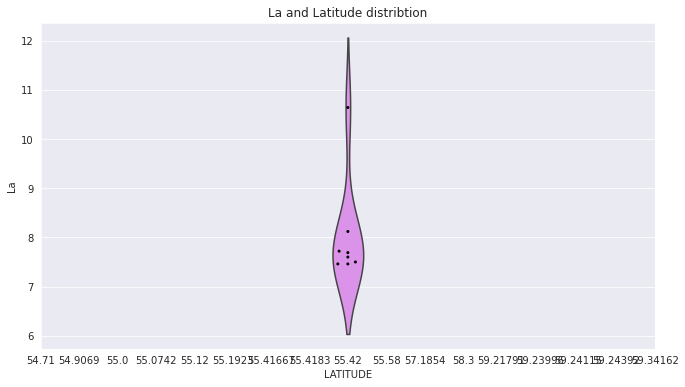

In [51]:
## Now, lets learn how to stack plots:

plt.figure(figsize=(11,6))
 
# Lets use the violin plot as our base
sns.violinplot(x='LATITUDE', y='La', data=df[150:300], inner=None) # The inner flag removed the box inside the violin plot
 
# Swarm plots put each of the points in teh actual distribution on the plot rather than the general curve.
sns.swarmplot(x='LATITUDE', y='La', data=df[150:300], color='k', size = 3) 

plt.xlim(34, 50)

plt.title('La and Latitude distribtion')

### 3) Working with a Dataset

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
df = pd.read_csv('NewExample.csv', index_col=0)
df.head()

,material,SiO2,TiO2,Al2O3,FeO,FeOT,Fe2O3T,MnO,MgO,CaO,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Yb,Lu,method
sample_id,,,,,,,,,,,,,,,,,,,,,
KNO0115-011,GL,50.57,1.81,14.69,NaN,10.64,NaN,0.175,7.33,11.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
KNO0115-012,GL,50.93,2.07,14.18,NaN,11.13,NaN,0.217,6.67,11.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
KNO0115-013-A,GL,50.71,1.92,14.69,NaN,10.71,NaN,0.208,6.93,10.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
KNO0115-013-B,GL,50.68,2.10,14.32,NaN,11.28,NaN,0.230,6.56,10.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
KNO0115-014,GL,50.59,1.82,15.14,NaN,10.20,NaN,0.191,7.22,10.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)


In [48]:
df.tail()

,material,SiO2,TiO2,Al2O3,FeO,FeOT,Fe2O3T,MnO,MgO,CaO,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Yb,Lu,method
sample_id,,,,,,,,,,,,,,,,,,,,,
KNO0115-007-002,GL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.281,MS-ID(3212)
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Query results from PETDB http://petdb.ldeo.columbia.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Query Date,5/10/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Query Criteria,"Sample name contains ""TK""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.drop(df.tail(4).index,inplace=True)

df

,material,SiO2,TiO2,Al2O3,FeO,FeOT,Fe2O3T,MnO,MgO,CaO,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Yb,Lu,method
sample_id,,,,,,,,,,,,,,,,,,,,,
KNO0115-011,GL,50.57,1.81,14.69,NaN,10.64,NaN,0.175,7.33,11.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
KNO0115-012,GL,50.93,2.07,14.18,NaN,11.13,NaN,0.217,6.67,11.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
KNO0115-013-A,GL,50.71,1.92,14.69,NaN,10.71,NaN,0.208,6.93,10.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
KNO0115-013-B,GL,50.68,2.10,14.32,NaN,11.28,NaN,0.230,6.56,10.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
KNO0115-014,GL,50.59,1.82,15.14,NaN,10.20,NaN,0.191,7.22,10.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(484)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KNO0115-014,GL,NaN,NaN,NaN,NaN,9.82,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMP(1788)
KNO0115-014,GL,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP-PH(1789)
KNO0115-001-001,GL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.412,MS-ID(3212)


In [31]:
# Skipped this so that the line of best fit doesnt account for all the zeros and mess up the calculation
df = df.fillna(0)
df

,material,SiO2,TiO2,Al2O3,FeO,FeOT,Fe2O3T,MnO,MgO,CaO,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Yb,Lu,method
sample_id,,,,,,,,,,,,,,,,,,,,,
KNO0115-011,GL,50.57,1.81,14.69,0.00,10.64,0.0,0.175,7.33,11.32,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,EMP(484)
KNO0115-012,GL,50.93,2.07,14.18,0.00,11.13,0.0,0.217,6.67,11.03,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,EMP(484)
KNO0115-013-A,GL,50.71,1.92,14.69,0.00,10.71,0.0,0.208,6.93,10.94,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,EMP(484)
KNO0115-013-B,GL,50.68,2.10,14.32,0.00,11.28,0.0,0.230,6.56,10.88,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,EMP(484)
KNO0115-014,GL,50.59,1.82,15.14,0.00,10.20,0.0,0.191,7.22,10.92,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,EMP(484)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KNO0115-014,GL,0.00,0.00,0.00,0.00,9.82,0.0,0.000,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,EMP(1788)
KNO0115-014,GL,0.00,0.00,0.00,9.26,0.00,0.0,0.000,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,SP-PH(1789)
KNO0115-001-001,GL,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.00,...,4.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412,MS-ID(3212)


In [33]:
df.shape

(117, 27)

In [50]:
minVal = df.min()
maxVal = df.max()
stdVal = df.std()

print("Min")
print(minVal)
print()
print("Max")
print(maxVal)
print()
print("Standard Deviation")
print(stdVal)
print()

Min
material           GL
SiO2            48.44
TiO2             1.08
Al2O3           14.18
FeO               7.4
FeOT             8.63
Fe2O3T            9.1
MnO              0.16
MgO              6.56
CaO             10.58
Na2O             2.54
K2O             0.078
P2O5            0.106
La               2.38
Ce               7.47
Pr               2.06
Nd               5.97
Sm               2.27
Eu               0.93
Gd               3.22
Tb              0.952
Dy               3.94
Ho               1.34
Er               2.55
Yb               2.57
Lu              0.281
method      DCP(1786)
dtype: object

Max
material           GL
SiO2            50.93
TiO2             2.18
Al2O3           16.66
FeO              9.39
FeOT            11.28
Fe2O3T          11.58
MnO              0.23
MgO              9.57
CaO             11.87
Na2O             3.57
K2O             0.194
P2O5            0.233
La                4.8
Ce              15.87
Pr               2.32
Nd              14.27
Sm       

(13.0, 18.0)

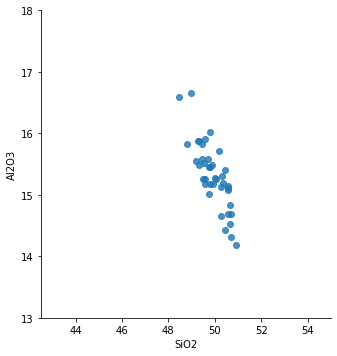

In [51]:
sns.lmplot(x="SiO2",y="Al2O3", data=df, fit_reg=False)
plt.xlim(42.5, 55)
plt.ylim(13, 18)

(13.0, 18.0)

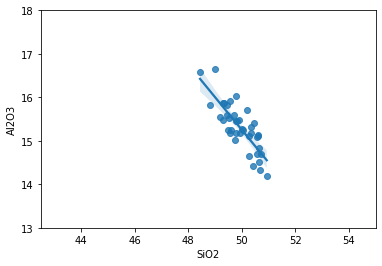

In [52]:
sns.regplot(x='SiO2', y='Al2O3', data=df)
plt.xlim(42.5, 55)
plt.ylim(13, 18)